### Importing House Rental Data into Jupyter Notebook

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('house_rental_data.csv')
df=df.drop(['Unnamed: 0'],axis=1)
df

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [2]:
df.tail()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000
644,1376.946,6,7,3,2,1,36000


In [3]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


### Checking for Null Values

In [4]:
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

### Deleting Duplicate Columns

In [5]:
df=df.drop_duplicates()

### Checking for DataTypes

In [6]:
df.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [7]:
df

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
639,2846.400,5,12,4,2,2,138888
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000


### Imporitng Seaborn to Visualize the data.
#### The corelation between each of the columns are represented in the below heatmap.

<Axes: >

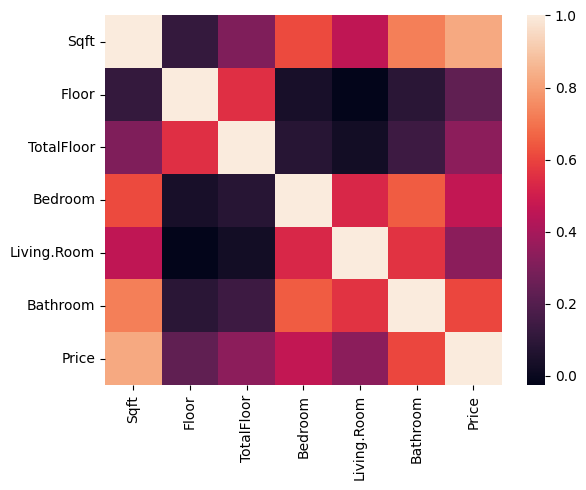

In [8]:
import seaborn as sns
sns.heatmap(df.corr())

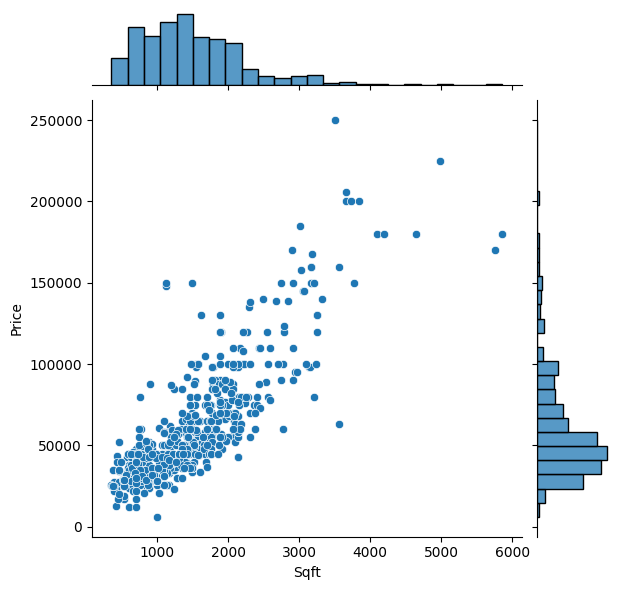

In [20]:
sns.jointplot(x='Sqft',y='Price',data=df,kind='scatter')

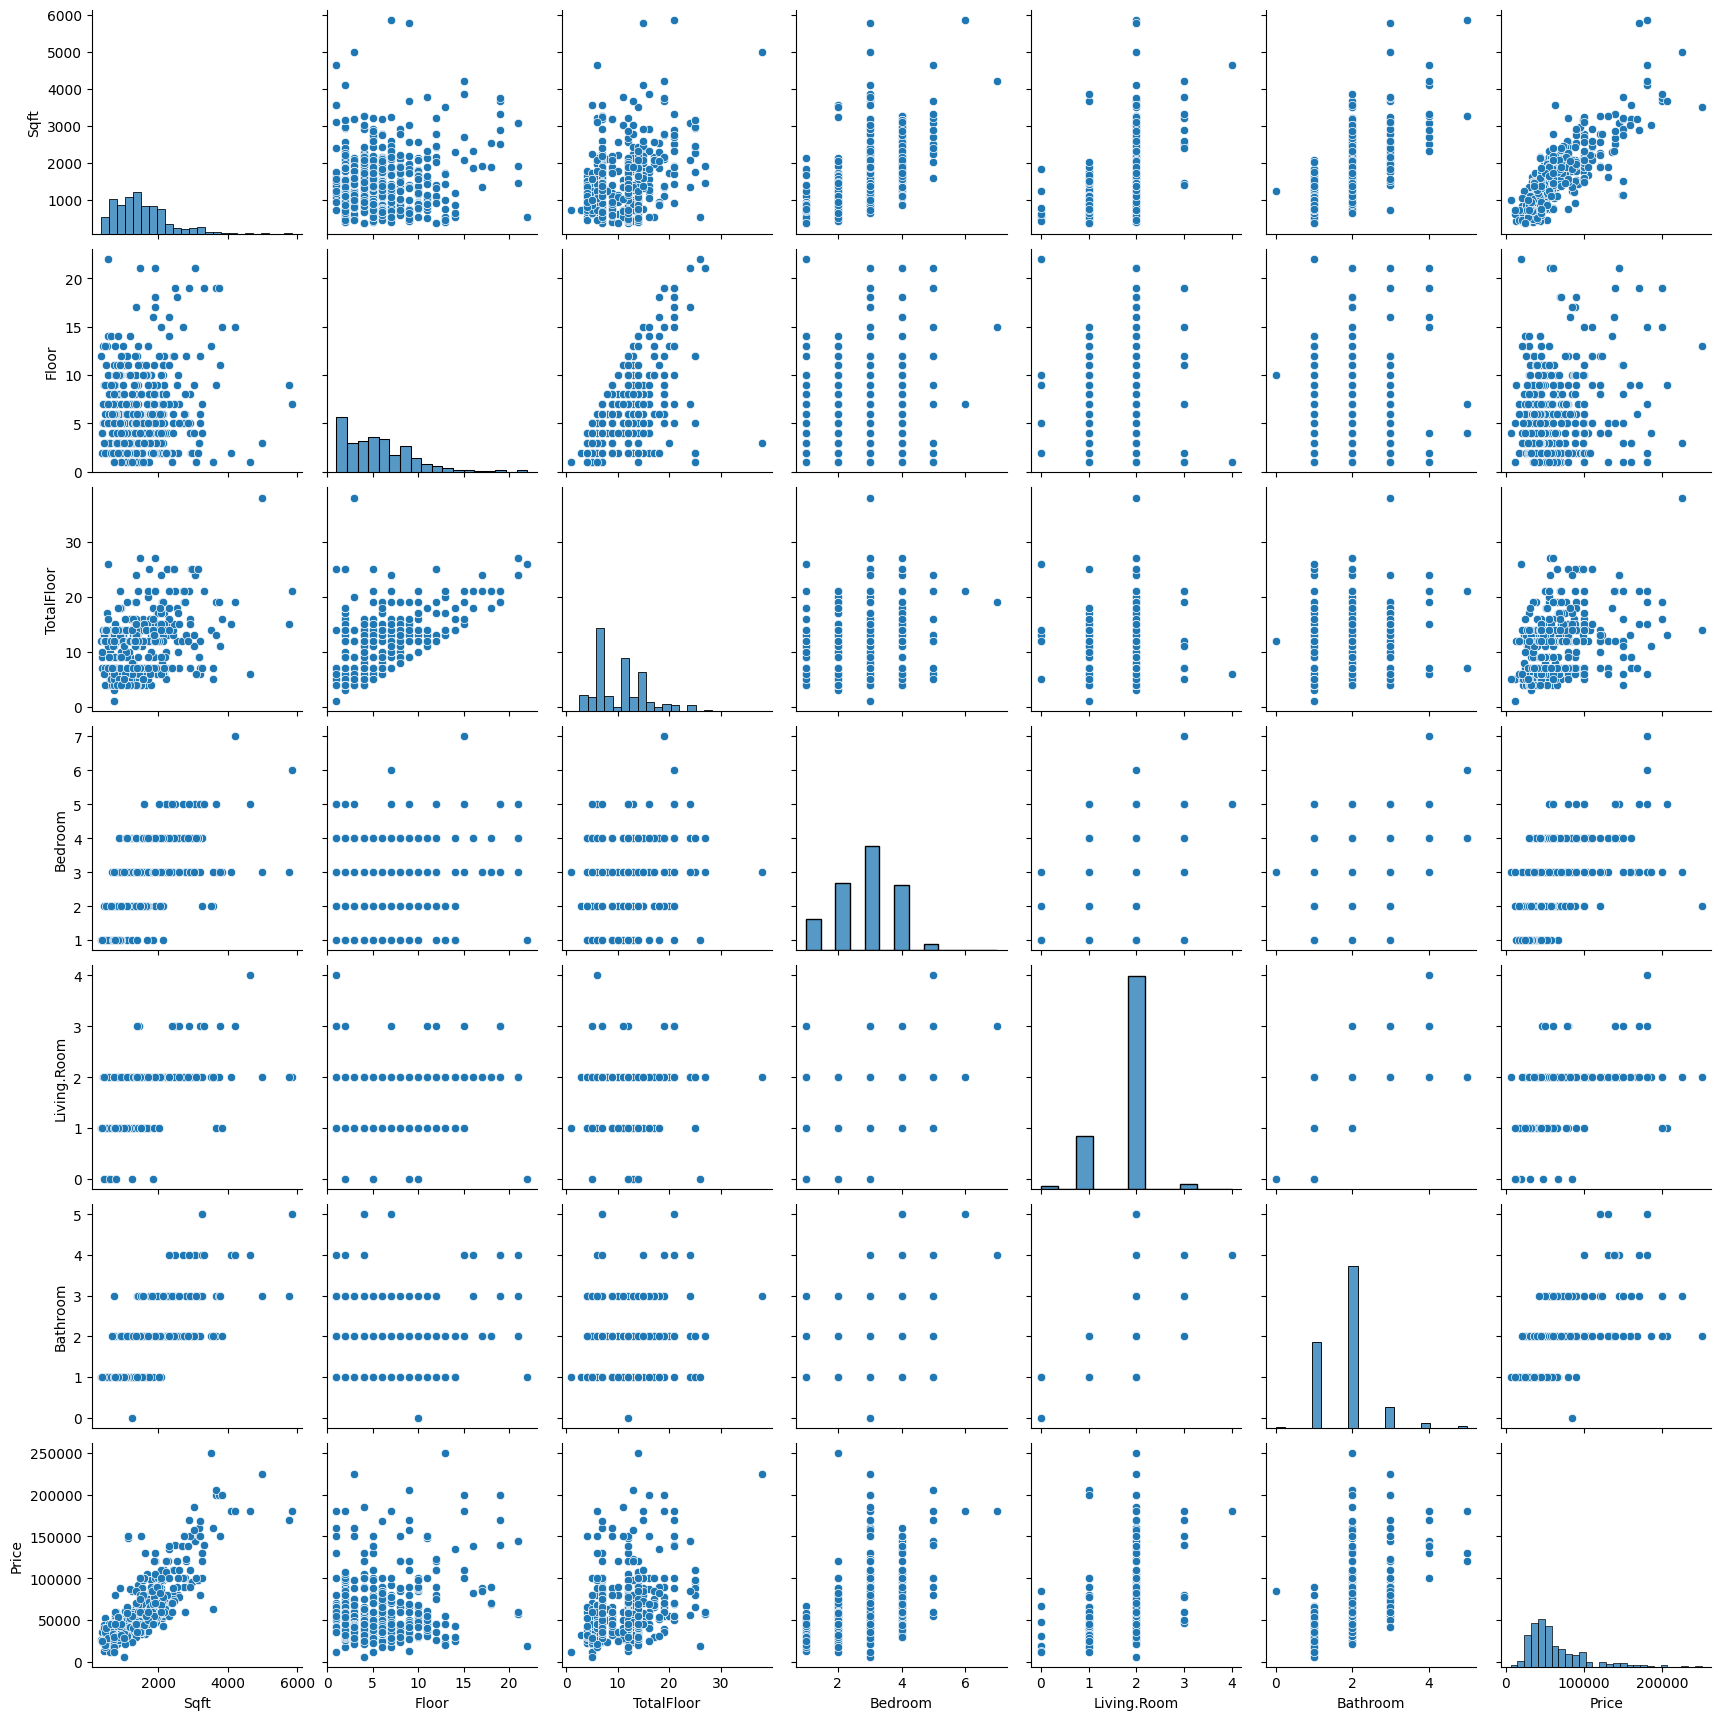

In [18]:
sns.pairplot(df)

### Splitting the data into input features and target variables

In [9]:
# Input Features
x=df.iloc[:,:6]
x

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
0,1177.698,2,7,2,2,2
1,2134.800,5,7,4,2,2
2,1138.560,5,7,2,2,1
3,1458.780,2,7,3,2,2
4,967.776,11,14,3,2,2
...,...,...,...,...,...,...
639,2846.400,5,12,4,2,2
640,1359.156,7,15,3,2,2
641,377.148,4,10,1,1,1
642,740.064,13,14,1,1,1


In [10]:
# Target Varibles
y=df.iloc[:,6]
y

0       62000
1       78000
2       58000
3       45000
4       45000
        ...  
639    138888
640     45000
641     24800
642     45000
644     36000
Name: Price, Length: 579, dtype: int64

### Train_Test_Split Process

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### Triainig the Model taking the K=5

In [21]:
from sklearn.neighbors import KNeighborsRegressor
knn_5 = KNeighborsRegressor(n_neighbors=5)
knn_5.fit(x_train,y_train)

KNeighborsRegressor()

In [24]:
y_pred_5 = knn_5.predict(x_test)
y_pred_5

array([ 62800. ,  47800. ,  74600. ,  63600. ,  51200. ,  99399.6,
        75400. ,  33600. ,  31700.4,  39000. ,  98599.6,  34060. ,
        39599.8,  61200. ,  70599.8,  57000. ,  34060. , 139600. ,
        39599.8,  46120. ,  56177.6,  31600. ,  78799.8,  63940. ,
        49560. ,  66599.8,  39000. ,  50900. ,  46679.8,  71600. ,
        38800. ,  55624. ,  36606.4,  39800. ,  38200. ,  35960. ,
        80599.8,  54400. ,  46679.8,  33600. ,  54599.8,  45799.8,
        54999.8,  93599.8,  37205.4,  31000.4,  51199.8, 137200. ,
        67400. ,  70000. ,  50920. , 191200. ,  70000. ,  46120. ,
        72800. ,  32566.4,  36606.4, 134691.2, 129599.8, 129599.8,
       108691.2,  70999.6,  43160. , 101599.8,  42299.6,  37700. ,
        33200. ,  37700. ,  43079.6,  41200. ,  98599.6,  44160. ,
       129599.8, 142000. ,  49700. ,  45599.8, 191200. ,  54977.6,
        80600. ,  80999.8,  54599.8,  55920. ,  61800. ,  70920. ,
        71600. ,  62000. ,  79200. ,  42299.6,  46679.8,  3160

In [14]:
input_data = (1800,3,6,2,3,2)
convert_to_array = np.asarray(input_data)
re_shape = convert_to_array.reshape(1,-1)
prediction = knn.predict(re_shape)
print(prediction)

[76999.8]


C:\Users\Nithin\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


### Training the model taking K=3

In [23]:
from sklearn.neighbors import KNeighborsRegressor
knn_3 = KNeighborsRegressor(n_neighbors=3)
knn_3.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [25]:
y_pred_3 = knn_3.predict(x_test)
y_pred_3

array([ 57000.        ,  51666.66666667,  75333.33333333,  61666.66666667,
        52666.66666667,  82333.        ,  77333.33333333,  37333.33333333,
        34500.66666667,  42000.        , 108332.66666667,  32766.66666667,
        45333.        ,  69333.33333333,  61666.33333333,  61666.66666667,
        34600.        , 143333.33333333,  39999.66666667,  49866.66666667,
        47333.33333333,  29666.66666667,  79333.33333333,  63266.66666667,
        51666.66666667,  65666.33333333,  42000.        ,  45000.        ,
        55333.        ,  66000.        ,  34666.66666667,  60000.        ,
        31677.33333333,  39000.        ,  39000.        ,  38666.66666667,
        90999.66666667,  52000.        ,  39133.33333333,  37333.33333333,
        54999.66666667,  49333.33333333,  54999.66666667, 102666.33333333,
        39342.66666667,  32666.66666667,  54999.66666667, 134333.33333333,
        57000.        ,  78000.        ,  45533.33333333, 202000.        ,
        78000.        ,  

In [30]:
from sklearn.neighbors import KNeighborsRegressor
knn_7 = KNeighborsRegressor(n_neighbors=7)
knn_7.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [31]:
y_pred_7 = knn_7.predict(x_test)
y_pred_7

array([ 68571.42857143,  48160.        ,  79857.14285714,  69142.85714286,
        47142.85714286, 100285.42857143,  78126.85714286,  35857.14285714,
        32786.        ,  42571.42857143,  99714.        ,  35757.14285714,
        46142.71428571,  57285.71428571,  79714.14285714,  59571.42857143,
        34042.85714286, 144714.28571429,  45983.85714286,  45800.        ,
        57484.        ,  34500.        ,  78142.57142857,  62642.85714286,
        51942.85714286,  72571.28571429,  40142.85714286,  46500.        ,
        47428.42857143,  67285.71428571,  37857.14285714,  52588.57142857,
        34433.14285714,  38571.42857143,  41571.42857143,  35757.14285714,
        78714.14285714,  56142.85714286,  43914.14285714,  35285.71428571,
        52714.14285714,  46142.71428571,  53428.42857143,  95428.42857143,
        37575.28571429,  32786.        ,  50856.85714286, 134857.14285714,
        71857.14285714,  71857.14285714,  48042.71428571, 172285.71428571,
        71857.14285714,  

#### Checking the r2 score of model having K = 5

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_5)

0.5228979800744107

#### Checking the r2 score of model having K = 3

In [28]:
r2_score(y_test,y_pred_3)

0.5330388565850681

#### Checking the r2 score of model having K = 7

In [32]:
r2_score(y_test,y_pred_7)

0.5262060961914825

#### The best r2 value is for the model having K=3